<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/W2025/Assignments/A1/SYSC4415_W25_A1.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Setup for local Running if you are not using Google Colab

Install [Anaconda distribution] (https://docs.anaconda.com/anaconda/install/)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn/sklearn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **waterqmark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

To make sure you have all of the packages you need, install them with `conda`:

```
conda create -n SYSC4415_tutorials python=3.11
conda activate SYSC4415_tutorials

conda install jupyter
conda install numpy pandas scikit-learn matplotlib seaborn graphviz statsmodels
conda install -c conda-forge watermark

```

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## NOTE about Signature in Google Colab:

Use `!pip install watermark` in Google Colab if you have errors while signing your notebook. If you work locally and follow the instructions above in the correct order, it should be already installed.

## General Instructions:

Please print out values when asked using Python's print() function with f-strings where possible.

Submit your saved notebook with all the outputs to Brightspace, but make sure that it will produce correct outputs upon restarting and click "runtime" → "run all" with clean outputs. Ensure your notebook displays all answers when this is clicked.

## Your Submission MUST contain your signature at the bottom.


In [ ]:
# Name:
# Student Number:

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz

## Section 1: Gradients (4 marks)
Hint: use attached PDF if you get lost.

In [2]:
"""
Q1a (1 mark)
- Manually derive and calculate the gradient of the function: f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x) at point (0,1, 1)
- Show each component of the gradient.

Print your answer using print() function showing all three partial derivatives.
"""

# YOUR ANSWER HERE
# d/dx (e^(x²) + y^y + e^(xy) + zcos(x)) = 2xe^(x^2) -zsin(x) +ye^(xy)
# d/dy (e^(x²) + y^y + e^(xy) + zcos(x)) = y^y(ln(y)+1)+xe^(xy)
# d/dz (e^(x²) + y^y + e^(xy) + zcos(x)) = cos(x)

print(f"∂f/dx = d/dx = 2xe^(x^2) - zsin(x) + ye^(xy) at point (0, 1, 1) = 1\n")
print(f"∂f/dy = d/dy = y^y(ln(y) + 1) + xe^(xy) at point (0, 1, 1) = 1\n")
print(f"∂f/dy = d/dz = cos(x) at point (0, 1, 1) = 1\n")

∂f/dx = d/dx = 2xe^(x^2) - zsin(x) + ye^(xy) at point (0, 1, 1) = 1

∂f/dy = d/dy = y^y(ln(y) + 1) + xe^(xy) at point (0, 1, 1) = 1

∂f/dy = d/dz = cos(x) at point (0, 1, 1) = 1



In [3]:
"""
Q1b (1 mark)
For each component of the gradient calculated in Q1a:
- Explain what the value means geometrically
- Provide a conclusion about each term and gradient in general
"""

# YOUR ANSWER HERE
pdX = "2xe^(x^2) - zsin(x) + ye^(xy)"
pdY = "y^y(ln(y) + 1) + xe^(xy)"
pdZ = "cos(x)"

print(f"The gradiant ∇f = ({pdX}, {pdY}, {pdZ}) and evaluating at (0, 1, 1) gives: (1, 1, 1)")
print(f" \n Geometrically, this tells us that the function is increasing in the x direction")
print(f" \n Geometrically, this tells us that the function is increasing in the y direction")
print(f" \n Geometrically, this tells us that the function is increasing in the z direction")

The gradiant ∇f = (2xe^(x^2) - zsin(x) + ye^(xy), y^y(ln(y) + 1) + xe^(xy), cos(x)) and evaluating at (0, 1, 1) gives: (1, 1, 1)
 
 Geometrically, this tells us that the function is increasing in the x direction
 
 Geometrically, this tells us that the function is increasing in the y direction
 
 Geometrically, this tells us that the function is increasing in the z direction


In [8]:
"""
Q1c (2 marks)
Write a Python function to verify your gradient calculation numerically:
1. Implement the function f(x,y,z)
2. Calculate numerical approximations of partial derivatives using small perturbations
3. Compare your analytical results from Q1a with numerical approximations
4. Report the result of function evaluation at the point (0,1,1)
"""

# YOUR ANSWER HERE
import numpy as np

def f(x, y, z):
  '''
  Implementation of the function:
  f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x)
  '''
  return np.exp(x**2) + y**y + np.exp(x*y) + z*np.cos(x)


def num_approx(x, y, z, h):
  '''
  Numerical approximation of the function:
  f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x) ,
  using small perturbations.
  '''
  pdx = ( f(x + h, y, z) - f(x - h, y, z) )/ (h * 2)
  pdy = ( f(x, y + h, z) - f(x, y - h, z) )/ (h * 2)
  pdz = ( f(x, y, z + h) - f(x, y, z - h) )/ (h * 2)

  return (pdx, pdy, pdz)

num_sol = num_approx(0, 1, 1, 0.001)
ana_sol = (1, 1, 1)

print(f"The numerical approximation is {num_sol} and the analytical solution is {ana_sol}.")
print(f"The two solutions are approximately equivalent.")


The numerical approximation is (1.0000001666663483, 1.0000005000001533, 0.9999999999996678) and the analytical solution is (1, 1, 1).
The two solutions are approximately equivalent.


## Section 2: Data Analysis (8 marks)

This section uses the Palmer Penguins dataset, which contains measurements from three penguin species.
The dataset includes physical measurements like bill length, bill depth, flipper length, and body mass. We are building a penguin classifier. First we need to assess out data.

In [20]:
"""
Q2a (1 mark)
✅ Load the Palmer Penguins dataset using Seaborn's load_dataset (provided)
- Show that it contains valid data
- Create variables for numerical features and labels
- Perform basic statistical analysis by printing the general statistics table as in Tutorials.
- Find missing values and drop records with missing values for any feature
- Save entries with missing values for "sex" in a separate variable, we'll use it later.
"""
import seaborn as sb
import pandas as pd


# Load data
penguins = sb.load_dataset("penguins")

# YOUR ANSWER HERE

# Show the data is valid
print("Validate Data:")
print(penguins)

# Variables for Features and Labels
species = penguins.species
island = penguins.island
bill_length_mm = penguins.bill_length_mm
bill_depth_mm = penguins.bill_depth_mm
flipper_length_mm = penguins.flipper_length_mm
body_mass_g = penguins.body_mass_g
sex = penguins.sex

# Statistical analysis
print('\nAnalysis:')
print(penguins.describe())

# Drop data with missing values
penguins_drop_null = penguins.dropna()
missing_sex = penguins[penguins.sex.isnull()]

# Data with missing 'sex' values
print("\nData Missing Sex:")
print(missing_sex)


Validate Data:
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  

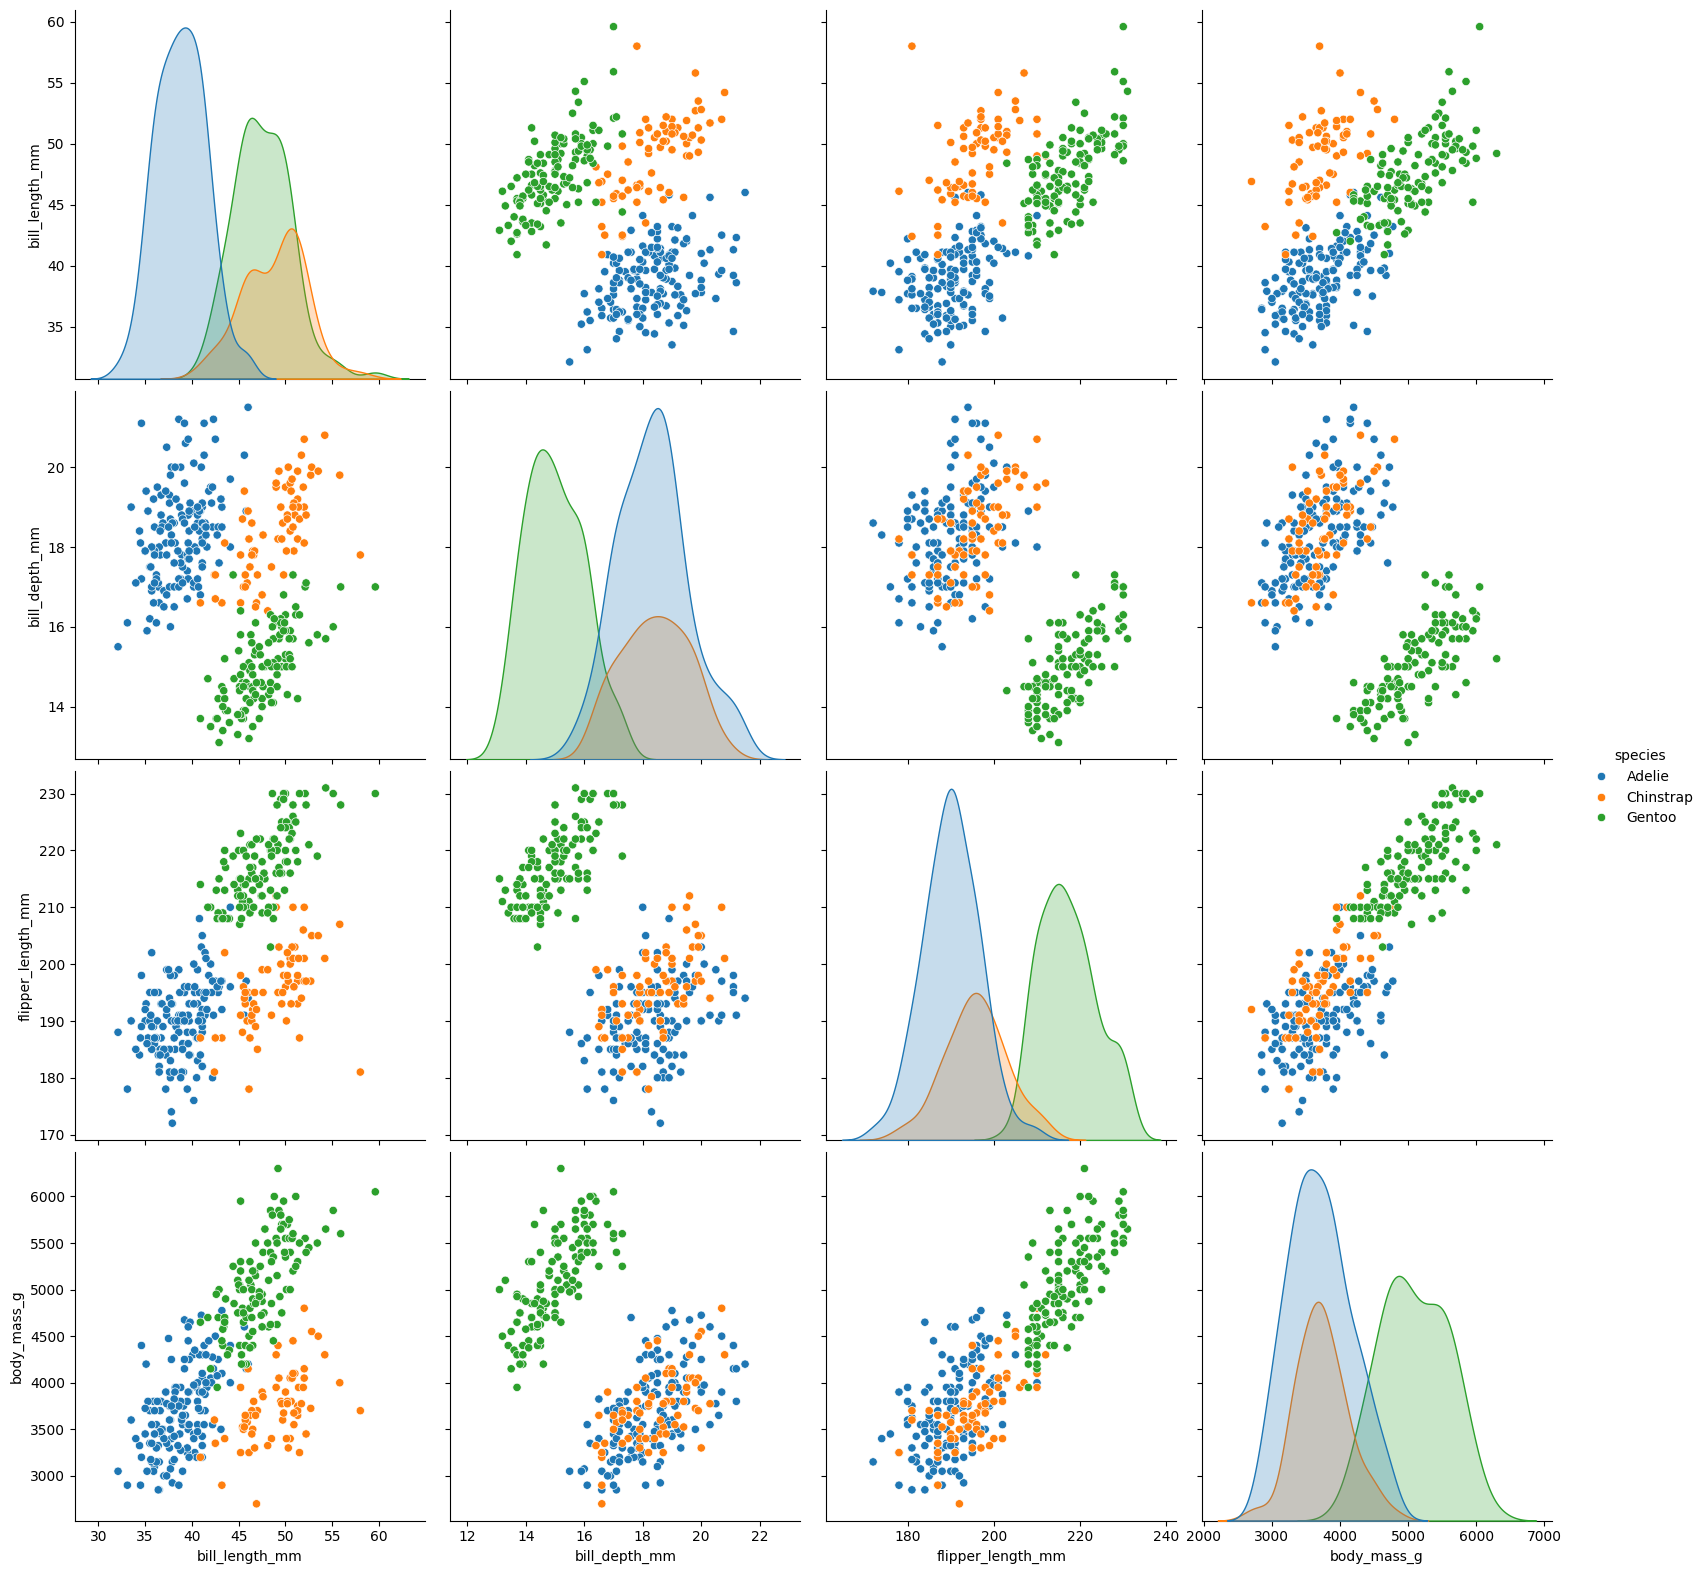

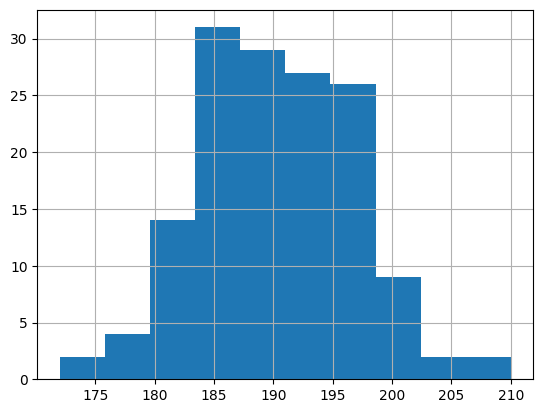

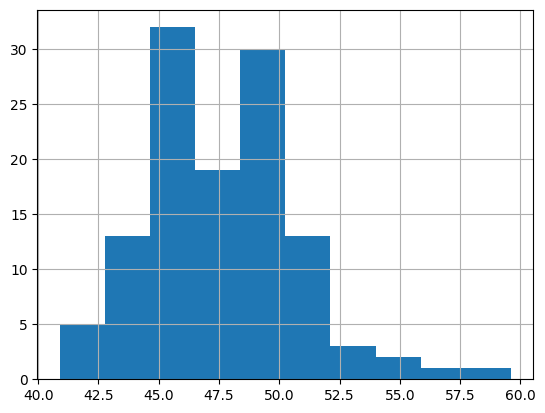

In [32]:
"""
Q2b (2 marks)
Create visualizations showing:
- Create scatterplot matrix for visual assessment of data
- Identify one feature with outliers and show distribution values for two classes (2 histograms).
"""

# YOUR ANSWER HERE

sb.pairplot(penguins_drop_null, hue='species', height=4)
plt.show()

penguins_drop_null.loc[penguins_drop_null['species'] == 'Adelie', 'flipper_length_mm'].hist()
plt.show()

penguins_drop_null.loc[penguins_drop_null['species'] == 'Gentoo', 'bill_length_mm'].hist()
plt.show()

In [82]:
"""
Q2c (1 mark)
Analyze class distribution and discuss implications for model training:
- Calculate and visualize class proportions
- Identify any class imbalance
"""

# YOUR ANSWER HERE

# Calculate class proportions
gentoo_count = penguins['species'].value_counts().get('Gentoo', 0)
adelie_count = penguins['species'].value_counts().get('Adelie', 0)
chinstrap_count = penguins['species'].value_counts().get('Chinstrap', 0)

gentoo_no_null_count = penguins_drop_null['species'].value_counts().get('Gentoo', 0)
adelie_no_null_count = penguins_drop_null['species'].value_counts().get('Adelie', 0)
chinstrap_no_null_count = penguins_drop_null['species'].value_counts().get('Chinstrap', 0)

print(f"Gentoo Class Count: \n{gentoo_count}")
print(f"Adelie Class Count: \n{adelie_count}")
print(f"Chinstrap Class Count: \n{chinstrap_count}")

print(f"Gentoo No Null Class Count: \n{gentoo_no_null_count}")
print(f"Adelie No Null Class Count: \n{adelie_no_null_count}")
print(f"Chinstrap No Null Class Count: \n{chinstrap_no_null_count}")

# Visualize class proportions



Gentoo Class Count: 
124
Adelie Class Count: 
152
Chinstrap Class Count: 
68
Gentoo No Null Class Count: 
119
Adelie No Null Class Count: 
146
Chinstrap No Null Class Count: 
68


## Section 3: Model Development (8 marks)
After polishing the data, let's make our classification model.

In [99]:
"""
Q3a (2 marks)
Preprocess the data:
- Use the clean dataset from Q2a (with missing values removed)
- Split into training (80%) and test (20%) sets using random_state=42
- Print first 5 rows of training data with their species labels
- Print shapes of both datasets
- Show number of samples per species in each split
"""

# YOUR ANSWER HERE

# Split clean dataset into training and test sets
inputs = penguins_drop_null[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
labels = penguins_drop_null['species'].values
(train_inputs, test_inputs, train_labels, test_labels) = train_test_split(inputs, labels, test_size=0.2, random_state=42)

# Print first 5 rows with their species labels
for n in range(5):
  print(f"{train_labels[n]}: {train_inputs[n]}")

# Print shapes of both datasets

# Number of samples per species in each split
train_species_count = pd.Series(train_labels).value_counts()
test_species_count = pd.Series(test_labels).value_counts()

print(f"\nSpecies count for Training Data:\n{train_species_count.to_string()}")
print(f"\nSpecies count for Testing Data:\n{test_species_count.to_string()}")


Gentoo: [  40.9   13.7  214.  4650. ]
Adelie: [  37.3   17.8  191.  3350. ]
Gentoo: [  50.    15.9  224.  5350. ]
Adelie: [  35.9   19.2  189.  3800. ]
Adelie: [  40.5   18.9  180.  3950. ]

Species count for Training Data:
Adelie       115
Gentoo        96
Chinstrap     55

Species count for Testing Data:
Adelie       31
Gentoo       23
Chinstrap    13


Train score: 1.0
Test score: 1.0
Mean: 0.9669340463458111
Std: 0.024995034792155084


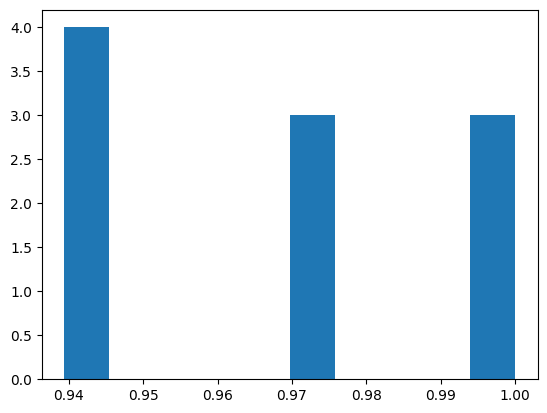


The histogram shows how often accuracy scores occurred in the 10-fold cross-validation


In [105]:
"""
Q3b (3 marks)
Train and evaluate a Decision Tree:
1. Create a Decision Tree with default parameters (random_state=42)
2. Evaluate the model:
   - Fit on training data (numerical features only)
   - Print training and test accuracy score for this tree
   - Perform 10-fold cross-validation
   - Print mean and std of cross-validation scores and build cv_scores histogram.
   - What does the histogram show?
"""

from sklearn.model_selection import cross_val_score

# YOUR ANSWER HERE

# Create the Decision tree
dtree = DecisionTreeClassifier(random_state=42)

# Evaluate the model
# Fit on training data
dtree.fit(train_inputs, train_labels)

# Print training and test accuracy score
train_score = dtree.score(train_inputs, train_labels)
test_score = dtree.score(test_inputs, test_labels)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

# 10-fold cross-validation scores
cv_scores = cross_val_score(dtree, inputs, labels, cv=10)

# Mean, std and cv_scores histogram
print(f"Mean: {np.mean(cv_scores)}")
print(f"Std: {np.std(cv_scores)}")
plt.hist(cv_scores)
plt.show()

# Histogram shows:
print("\nThe histogram shows how often accuracy scores occurred in the 10-fold cross-validation")

In [ ]:
"""
Q3c (3 marks)
Analyze the best model from grid search:
- Initialize parameter_grid, cross_validation using StratifiedKFold
- Identify the best parameters for the tree and show the grid heatmap (don't forget labels)
- Plot the best tree structure using graphviz, use max_depth=2 (for better display)

Note: when using export_graphviz set out_file=None and use display(graph) function call, where
graph is your variable instantiated with Source(dot_data)
Export_graphviz Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.export_graphviz.html
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn.tree import export_graphviz
from graphviz import Source

# YOUR ANSWER HERE
dot_data = export_graphviz(dtree,
                           out_file=None,
                           feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
                           class_names=np.np.unique(train_labels),
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=2)

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}






## Section 4: Missing_Sex Prediction (4 marks)
In this part of the assignment, we are building a model to infer the missing values from the original dataset to fix the broken records.


In [ ]:
"""
Q4a (2 marks)
Prepare data for sex prediction:
- Use the clean dataset (no missing values) from Section 2
- Convert species to numeric values.

Note: Unlike the example in the tutorial, we will use a more straightforward method, LabelEncoder().

For this task, you just need to instantiate it, use the fit_transform method on the "species" column,
and reassign or add the column.
See documentation for details:
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Create new feature/label split using "sex" as target
- Scale features using StandardScaler().fit_transform(features) as in Tutorial
See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Split data into training (80%) and test (20%) sets
- Train these classifiers:
  * Logistic Regression (solver='lbfgs')
  * Decision Tree (max_depth=3)
  * KNN (n_neighbors=5)
  * SVM (kernel="linear", C=0.025)
- Compare models using (Providing values for each would be enough):
  * Training and test accuracy
  * 10-fold cross-validation scores


"""

# Prepare features including species as numeric
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# YOUR ANSWER HERE


In [ ]:
"""
Q4b (2 marks)
Use best model to predict missing sex:
- Make sure to create new variable for subset to work with and copy your variable with missing records into it,
using new_var = your_variable.copy().
- Print records with missing sex values from section 2.
- Remove records that have missing values other than sex using dropna: df.dropna(subset=['column_name'],inplace=True).
- Scale features using StandardScaler().fit_transform(features) as in Q3
- Create new features/labels variables for the new dataset.

- Select best classifier based on test performance from Q4a

- For each record in missing_sex dataset, using best_model.predict(features) and best_model.predict_proba(features)
- Add missing values to the clean dataset and make sure there are no missing values.
"""

# YOUR ANSWER HERE

#### Congratulations! What you just did is called **model-based multiple imputation**. It is one of the methods used to treat missing data.

## Signature:
Don't forget to insert your name and student number and execute.

In [95]:
# Provide your Signarure:
%load_ext watermark
%watermark -a 'Cade Theriault, 101192252' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,graphviz

ModuleNotFoundError: No module named 'watermark'